<a href="https://colab.research.google.com/github/AnkitPatel745/Text-Data-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# improting reqired library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the file
# Parse Error can be removed by ("error_bad_lines")
comment = pd.read_csv('/content/drive/MyDrive/Data Science Project/EDA Projects/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [ ]:
# First look 
comment.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [ ]:
#!pip install textblob
from textblob import TextBlob

In [ ]:
# Look for polarity of the first comment
TextBlob("It's more accurate to call it the M+ (1000) be...	").sentiment.polarity

0.45000000000000007

In [ ]:
# Finding any null value
comment.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
# dropping null value
comment.dropna(inplace=True)

In [ ]:
# Appendding polarity value 
polarity=[]
for i in comment['comment_text']:
   polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
# Creating new polarity column
comment['polarity']=polarity

In [ ]:
# First look
comment.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


In [ ]:
# Consider only polarity 1 value
comment_positive = comment[comment['polarity']==1]

In [ ]:
comment_positive.shape

(20400, 5)

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

In [ ]:
# Unique Value
stopwords=set(STOPWORDS)

In [ ]:
# Joining The Positive Comment 
total_comment=' ' .join(comment_positive['comment_text'])

In [ ]:
# This data Is Too big in the github so commit it 
#total_comment

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [ ]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

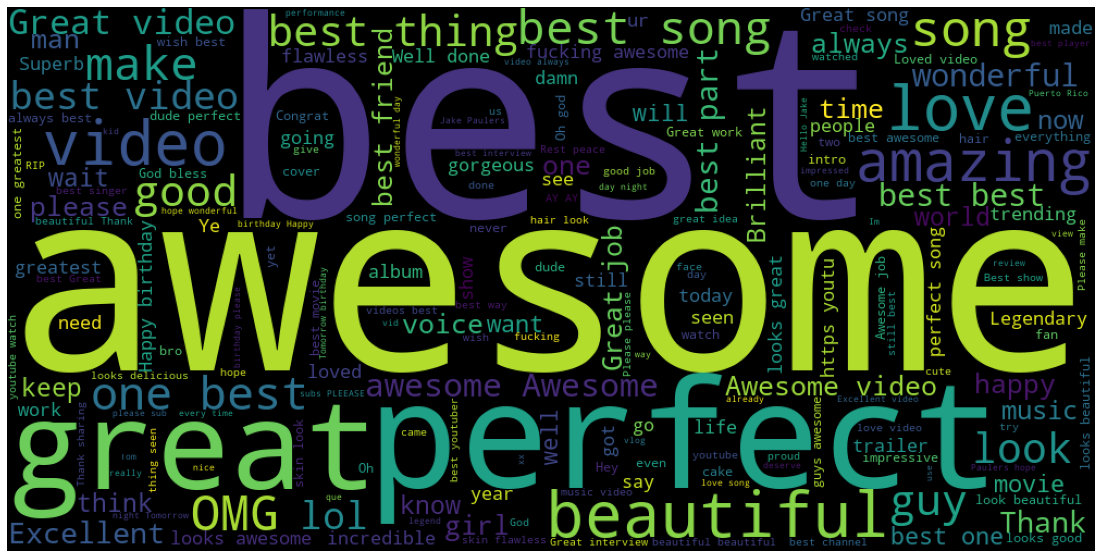

In [ ]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
# Consider only polarity -1 value
comment_negative = comment[comment['polarity']==-1]

In [ ]:
# Joining The Nagative Comment 
total_comment=' ' .join(comment_negative['comment_text'])

In [ ]:
# Creating The Word Cloud
wordcloud=WordCloud(width=1000,height=500).generate(total_comment)

(-0.5, 999.5, 499.5, -0.5)

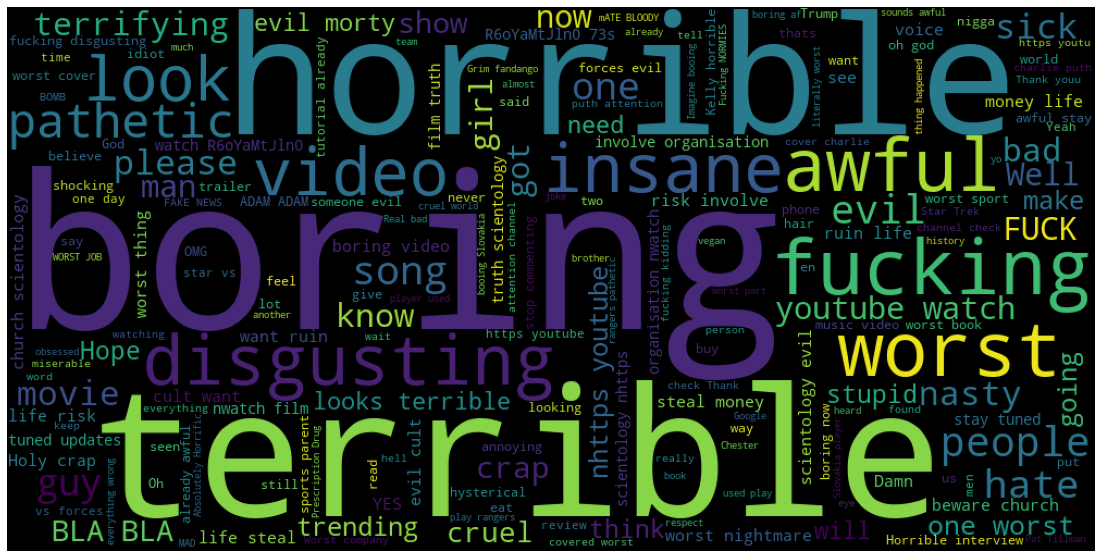

In [ ]:
# Plot the Figure
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')